# APSG tutorial - Part 3

In [1]:
from apsg import *

## Pandas interface

To activate APSG interface for pandas you need to import it.

In [2]:
import pandas as pd
from apsg.pandas import *

We can use pandas to read and manage data. See pandas documentation for more information.

In [3]:
df = pd.read_csv('structures.csv')
df.head()

site structure  azi  inc
0  PB3        L3  113   47
1  PB3        L3  118   42
2  PB3        S1   42   79
3  PB3        S1   42   73
4  PB4        S0  195   10

We can split out dataset by type of the structure...

In [4]:
g = df.groupby('structure')

and select only one type...

In [5]:
l = g.get_group('L3')
l.head()

site structure  azi  inc
0  PB3        L3  113   47
1  PB3        L3  118   42
5  PB8        L3  167   17
6  PB9        L3  137    9
7  PB9        L3  147   14

Before we can use APSG interface, we need to create column with APSG features. For that we can use `apsg` accessor and it's methods `create_vecs`, `create_fols`, `create_lins` or `create_faults`. Each of this method accepts keyword argument `name` to provide name of the new column.

In [6]:
l = l.apsg.create_lins(name='L3')
l.head()

site structure  azi  inc        L3
0  PB3        L3  113   47  L:113/47
1  PB3        L3  118   42  L:118/42
5  PB8        L3  167   17  L:167/17
6  PB9        L3  137    9   L:137/9
7  PB9        L3  147   14  L:147/14

Once we create column with APSG features, we can use accessors `vec`, `fol`, `lin` or `fault` providing methods for individual feature types, e.g. to calculate resultant vector

In [7]:
l.lin.R()

L:122/8

or to calculate orientation tensor...

In [8]:
l.lin.ortensor()

OrientationTensor3
[[ 0.29  -0.344 -0.067]
 [-0.344  0.644  0.088]
 [-0.067  0.088  0.065]]
(S1:0.932, S2:0.29, S3:0.216)

or to plot data on stereonet...

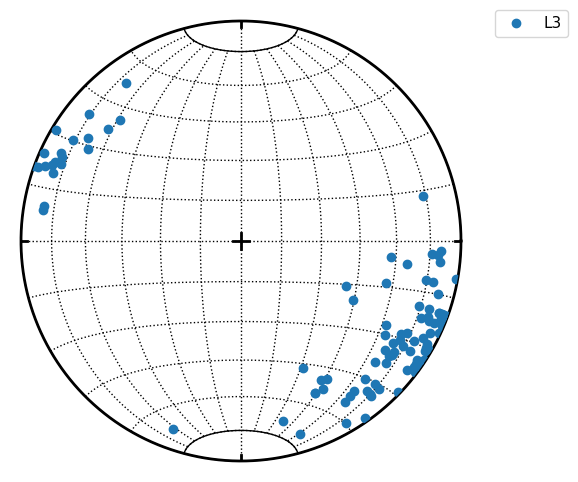

In [9]:
l.lin.plot(label=True)

You can also extract APSG column as featureset using accessor property `getset`

In [10]:
l.lin.getset

L(97) L3

To construct stereonets with more data, you can pass stereonet object using keyword argument `snet`

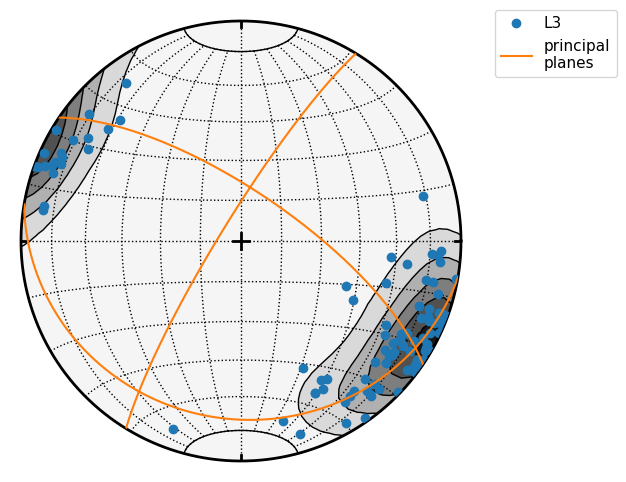

In [11]:
s = StereoNet()
l.lin.contour(snet=s)
l.lin.plot(snet=s, label=True)
pp = l.lin.ortensor().eigenfols
s.great_circle(*pp, label='principal\nplanes')
s.show()

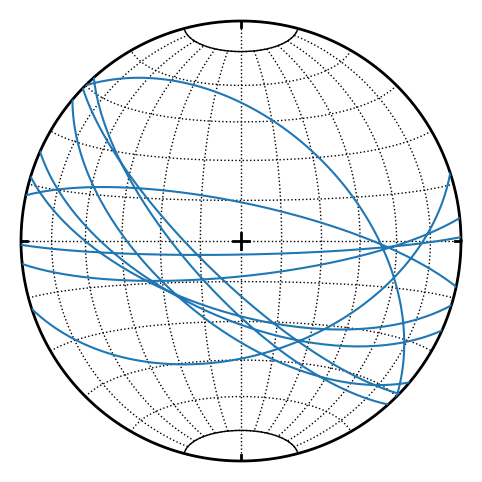

In [12]:
f = g.get_group('S2').apsg.create_fols(name='S2')
f.fol.plot()

The fault features could be created from columns containing orientation of fault plane, fault striation and sense of shear (+/-1)

In [13]:
df = pd.read_csv('mele.csv')
df.head()

fazi    finc     lazi    linc  sense
0   94.997  79.966  119.073  79.032     -1
1   65.923  84.972  154.087  20.008     -1
2   42.354  46.152  109.786  21.778     -1
3   14.093  61.963  295.917  21.045      1
4  126.138  77.947   40.848  21.033     -1

In [14]:
t = df.apsg.create_faults()
t.head()

fazi    finc     lazi    linc  sense            faults
0   94.997  79.966  119.073  79.032     -1  F:95/80-119/79 -
1   65.923  84.972  154.087  20.008     -1  F:66/85-154/20 -
2   42.354  46.152  109.786  21.778     -1  F:42/46-110/22 -
3   14.093  61.963  295.917  21.045      1  F:14/62-296/21 +
4  126.138  77.947   40.848  21.033     -1  F:126/78-41/21 -

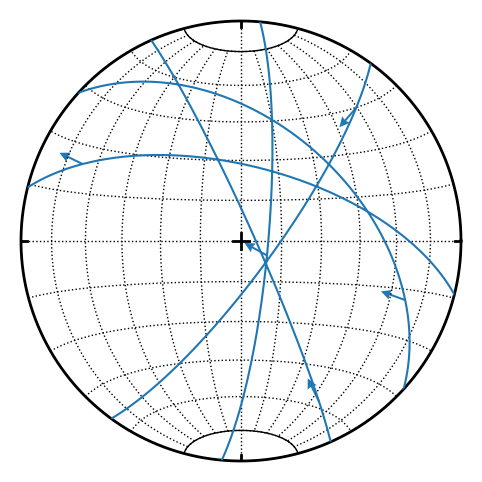

In [15]:
t[:5].fault.plot()

In [16]:
df = pd.read_excel('fielddata.xlsx')
df

Site         Rock Phase  fazi  finc   lazi  linc
0  L150  orthogneiss    D1   120    60   96.0  55.0
1   NaN          NaN   NaN   140    55    NaN   NaN
2   NaN          NaN   NaN   150    52  105.0  48.0
3   NaN          NaN    D2   230    80    NaN   NaN
4  L151   micaschist    D1    96    62   99.0  58.0
5   NaN          NaN   NaN   115    57    NaN   NaN
6   NaN          NaN    D2   236    82    NaN   NaN

In [17]:
df.loc[:, ['Site', 'Rock', 'Phase']] = df.loc[:, ['Site', 'Rock', 'Phase']].ffill()
df

Site         Rock Phase  fazi  finc   lazi  linc
0  L150  orthogneiss    D1   120    60   96.0  55.0
1  L150  orthogneiss    D1   140    55    NaN   NaN
2  L150  orthogneiss    D1   150    52  105.0  48.0
3  L150  orthogneiss    D2   230    80    NaN   NaN
4  L151   micaschist    D1    96    62   99.0  58.0
5  L151   micaschist    D1   115    57    NaN   NaN
6  L151   micaschist    D2   236    82    NaN   NaN

In [18]:
g = df.groupby('Phase')
d1 = g.get_group('D1')
s1 = d1.apsg.create_fols(columns=['fazi', 'finc'])
s1

Site         Rock Phase  fazi  finc   lazi  linc      fols
0  L150  orthogneiss    D1   120    60   96.0  55.0  S:120/60
1  L150  orthogneiss    D1   140    55    NaN   NaN  S:140/55
2  L150  orthogneiss    D1   150    52  105.0  48.0  S:150/52
4  L151   micaschist    D1    96    62   99.0  58.0   S:96/62
5  L151   micaschist    D1   115    57    NaN   NaN  S:115/57

In [19]:
l1 = d1.apsg.create_lins(columns=['lazi', 'linc'])
l1

Site         Rock Phase  fazi  finc   lazi  linc       lins
0  L150  orthogneiss    D1   120    60   96.0  55.0    L:96/55
1  L150  orthogneiss    D1   140    55    NaN   NaN  L:nan/nan
2  L150  orthogneiss    D1   150    52  105.0  48.0   L:105/48
4  L151   micaschist    D1    96    62   99.0  58.0    L:99/58
5  L151   micaschist    D1   115    57    NaN   NaN  L:nan/nan

In [20]:
l1 = d1.dropna(subset=['lazi', 'linc']).apsg.create_lins(columns=['lazi', 'linc'])
l1

Site         Rock Phase  fazi  finc   lazi  linc      lins
0  L150  orthogneiss    D1   120    60   96.0  55.0   L:96/55
2  L150  orthogneiss    D1   150    52  105.0  48.0  L:105/48
4  L151   micaschist    D1    96    62   99.0  58.0   L:99/58

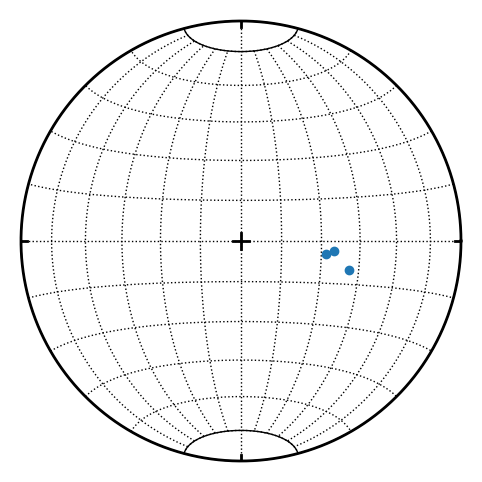

In [21]:
l1.lin.plot()